# Data Mining - Final Project (Game Recommendation on Steam)

### Mounting Google Drive and Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
merged_sampled_data = pd.read_csv("/content/drive/MyDrive/Steam Game Dataset/merged_sampled_data.csv")

### Exploratory Data Analysis and Data Pre-processing

In [ ]:
merged_sampled_data.head()

,app_id,is_recommended,user_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,products,reviews
0,601150.0,True,6991933.0,Devil May Cry 5,2019-03-07,True,False,False,Overwhelmingly Positive,95,71034,30.00,0.00,0.0,True,402,63
1,400.0,True,11264359.0,Portal,2007-10-10,True,True,True,Overwhelmingly Positive,98,117868,10.00,0.00,0.0,True,403,13
2,870780.0,False,11757719.0,Control Ultimate Edition,2020-08-27,True,False,False,Very Positive,88,28339,9.99,39.99,75.0,True,72,17
3,552100.0,True,14248104.0,Brick Rigs,2023-07-14,True,False,False,Very Positive,93,31911,19.00,0.00,0.0,True,22,2
4,49520.0,True,5719610.0,Borderlands 2,2012-09-17,True,True,True,Overwhelmingly Positive,95,184041,20.00,0.00,0.0,True,39,1


In [ ]:
print("Shape of the sampled dataset:", merged_sampled_data.shape)

Shape of the sampled dataset: (411465, 17)


In [ ]:
merged_sampled_data.describe()

,app_id,user_id,positive_ratio,user_reviews,price_final,price_original,discount,products,reviews
count,4.114650e+05,4.114650e+05,411465.000000,4.114650e+05,411465.000000,411465.000000,411465.000000,411465.000000,411465.000000
mean,6.042294e+05,7.453069e+06,86.138320,1.758673e+05,18.630967,7.365986,3.154749,288.946610,26.160558
std,4.727313e+05,4.011432e+06,11.272081,5.916115e+05,16.580388,11.983168,14.749799,705.883305,123.057509
min,1.000000e+01,1.200000e+01,3.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.557100e+05,4.289954e+06,82.000000,9.950000e+03,4.990000,0.000000,0.000000,50.000000,2.000000
50%,4.361500e+05,7.546071e+06,89.000000,4.560600e+04,15.000000,0.000000,0.000000,119.000000,5.000000
75%,9.331100e+05,1.097834e+07,94.000000,1.363850e+05,29.990000,14.990000,0.000000,274.000000,15.000000
max,2.240530e+06,1.430600e+07,100.000000,7.494460e+06,199.990000,199.990000,90.000000,32214.000000,2470.000000


In [ ]:
merged_sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411465 entries, 0 to 411464
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   app_id          411465 non-null  float64
 1   is_recommended  411465 non-null  bool   
 2   user_id         411465 non-null  float64
 3   title           411465 non-null  object 
 4   date_release    411465 non-null  object 
 5   win             411465 non-null  bool   
 6   mac             411465 non-null  bool   
 7   linux           411465 non-null  bool   
 8   rating          411465 non-null  object 
 9   positive_ratio  411465 non-null  int64  
 10  user_reviews    411465 non-null  int64  
 11  price_final     411465 non-null  float64
 12  price_original  411465 non-null  float64
 13  discount        411465 non-null  float64
 14  steam_deck      411465 non-null  bool   
 15  products        411465 non-null  int64  
 16  reviews         411465 non-null  int64  
dtypes: bool(5)

In [ ]:
print("Missing values in each column:")
print(merged_sampled_data.isnull().sum())

Missing values in each column:
app_id            0
is_recommended    0
user_id           0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
products          0
reviews           0
dtype: int64


In [ ]:
# Unique counts of key columns
print("Unique app_ids:", merged_sampled_data['app_id'].nunique())
print("Unique user_ids:", merged_sampled_data['user_id'].nunique())

Unique app_ids: 16915
Unique user_ids: 291406


In [ ]:
# Convert date columns into datetime format
merged_sampled_data['date_release'] = pd.to_datetime(merged_sampled_data['date_release'], errors='coerce')

# Drop rows with invalid dates
merged_sampled_data.dropna(subset=['date_release'], inplace=True)

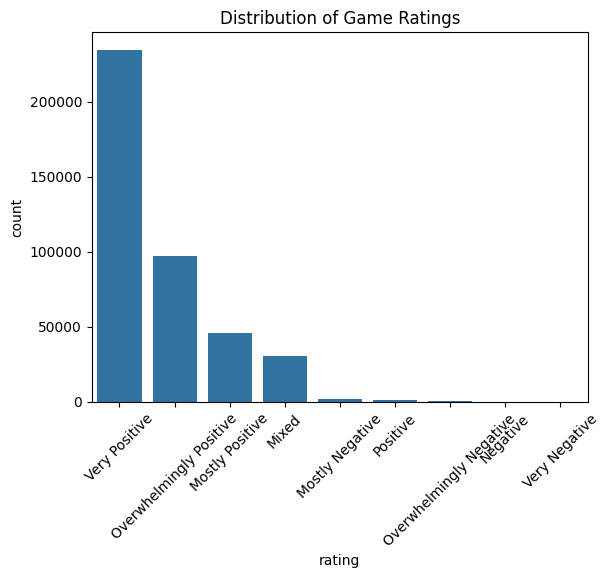

In [ ]:
# Distribution of game ratings
sns.countplot(x='rating', data=merged_sampled_data, order=merged_sampled_data['rating'].value_counts().index)
plt.title("Distribution of Game Ratings")
plt.xticks(rotation=45)
plt.show()

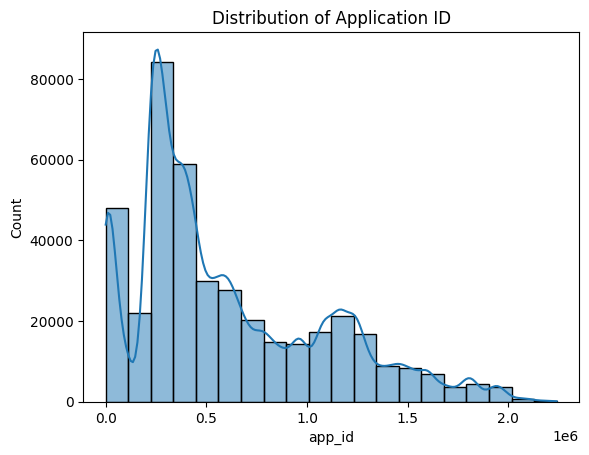

In [ ]:
sns.histplot(merged_sampled_data["app_id"], bins=20, kde=True)
plt.title(f"Distribution of Application ID")
plt.xlabel('app_id')
plt.show()

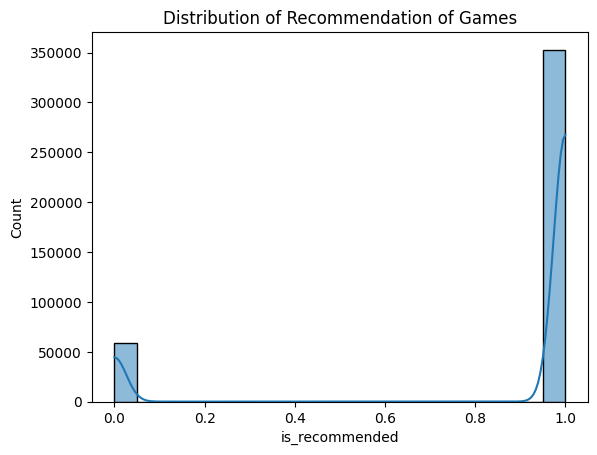

In [ ]:
sns.histplot(merged_sampled_data['is_recommended'], bins=20, kde=True)
plt.title("Distribution of Recommendation of Games")
plt.xlabel("is_recommended")
plt.show()

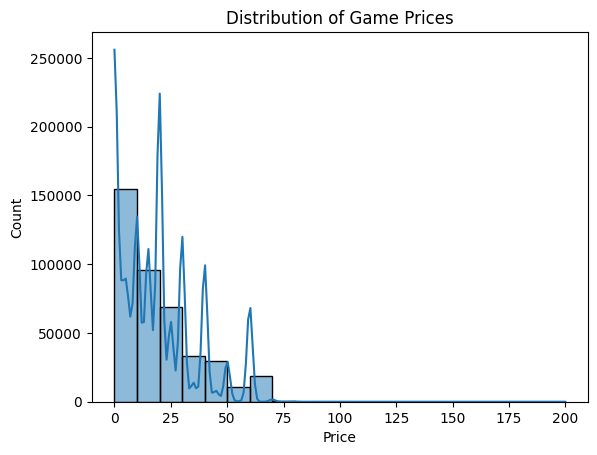

In [ ]:
# Distribution of final prices
sns.histplot(merged_sampled_data['price_final'], bins=20, kde=True)
plt.title("Distribution of Game Prices")
plt.xlabel("Price")
plt.show()

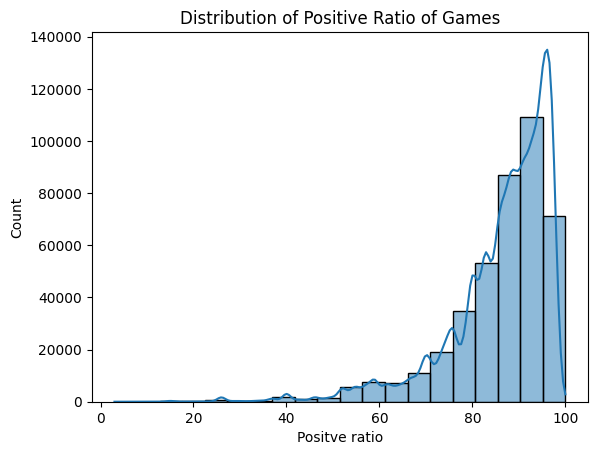

In [ ]:
# Distribution of final prices
sns.histplot(merged_sampled_data['positive_ratio'], bins=20, kde=True)
plt.title("Distribution of Positive Ratio of Games")
plt.xlabel("Positve ratio")
plt.show()

<ipython-input-13-6e8abfede338>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts = merged_sampled_data[['linux', 'mac', 'win']].apply(pd.value_counts)


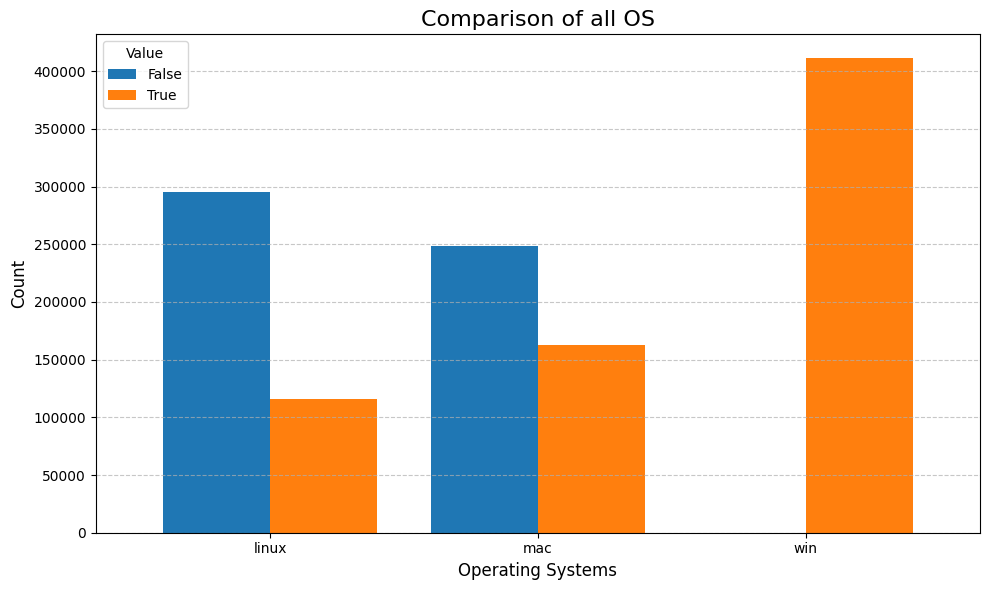

In [ ]:
counts = merged_sampled_data[['linux', 'mac', 'win']].apply(pd.value_counts)
counts.T.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Comparison of all OS', fontsize=16)
plt.xlabel('Operating Systems', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Value')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

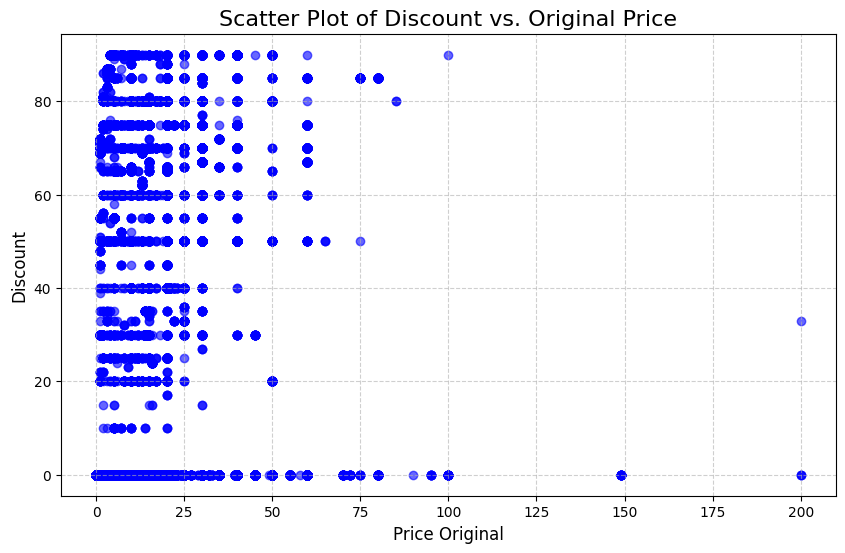

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_sampled_data['price_original'], merged_sampled_data['discount'], alpha=0.6, color='blue')

plt.title('Scatter Plot of Discount vs. Original Price', fontsize=16)
plt.xlabel('Price Original', fontsize=12)
plt.ylabel('Discount', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

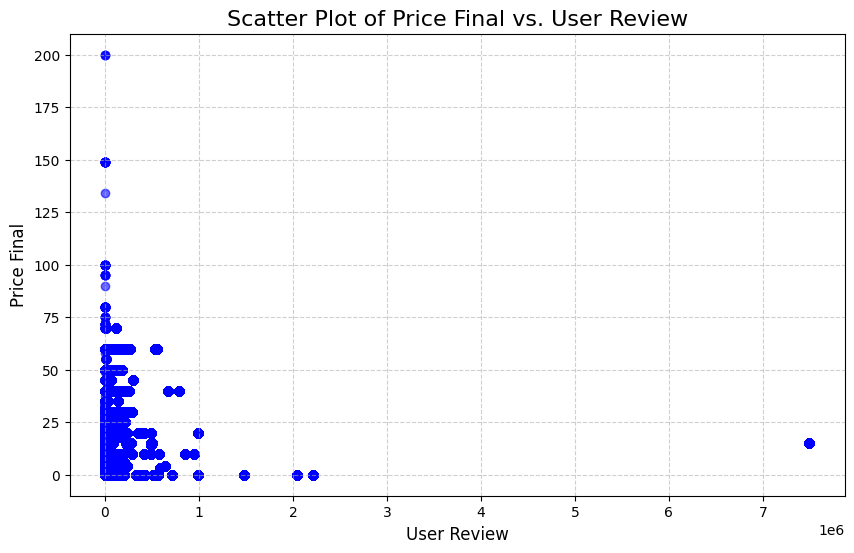

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_sampled_data['user_reviews'], merged_sampled_data['price_final'], alpha=0.6, color='blue')

plt.title('Scatter Plot of Price Final vs. User Review', fontsize=16)
plt.xlabel('User Review', fontsize=12)
plt.ylabel('Price Final', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

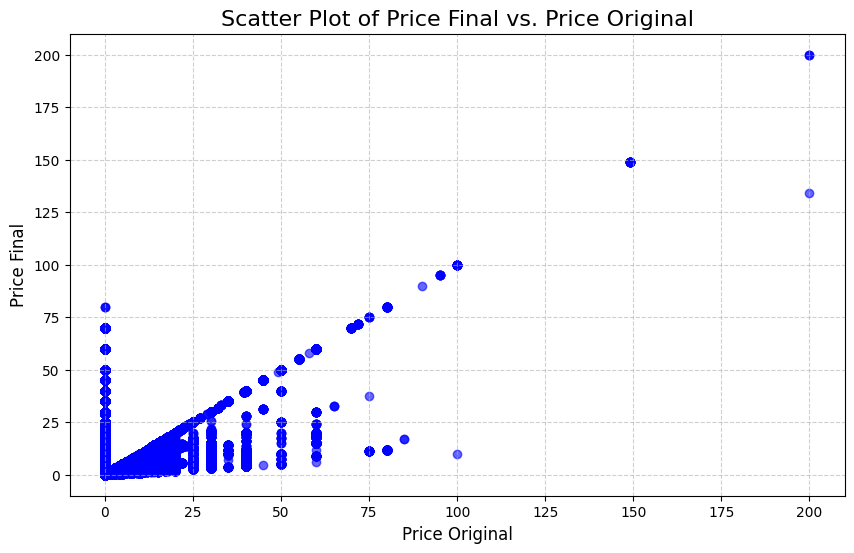

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_sampled_data['price_original'], merged_sampled_data['price_final'], alpha=0.6, color='blue')

plt.title('Scatter Plot of Price Final vs. Price Original', fontsize=16)
plt.xlabel('Price Original', fontsize=12)
plt.ylabel('Price Final', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

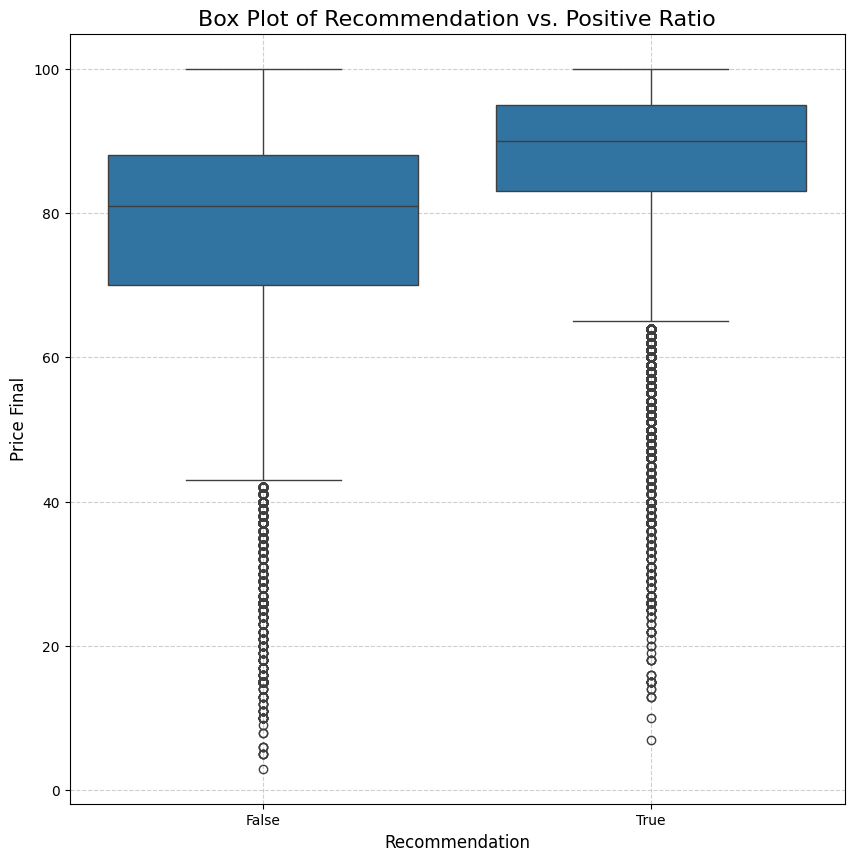

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='is_recommended', y='positive_ratio', data=merged_sampled_data)
plt.title('Box Plot of Recommendation vs. Positive Ratio', fontsize=16)
plt.xlabel('Recommendation', fontsize=12)
plt.ylabel('Price Final', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

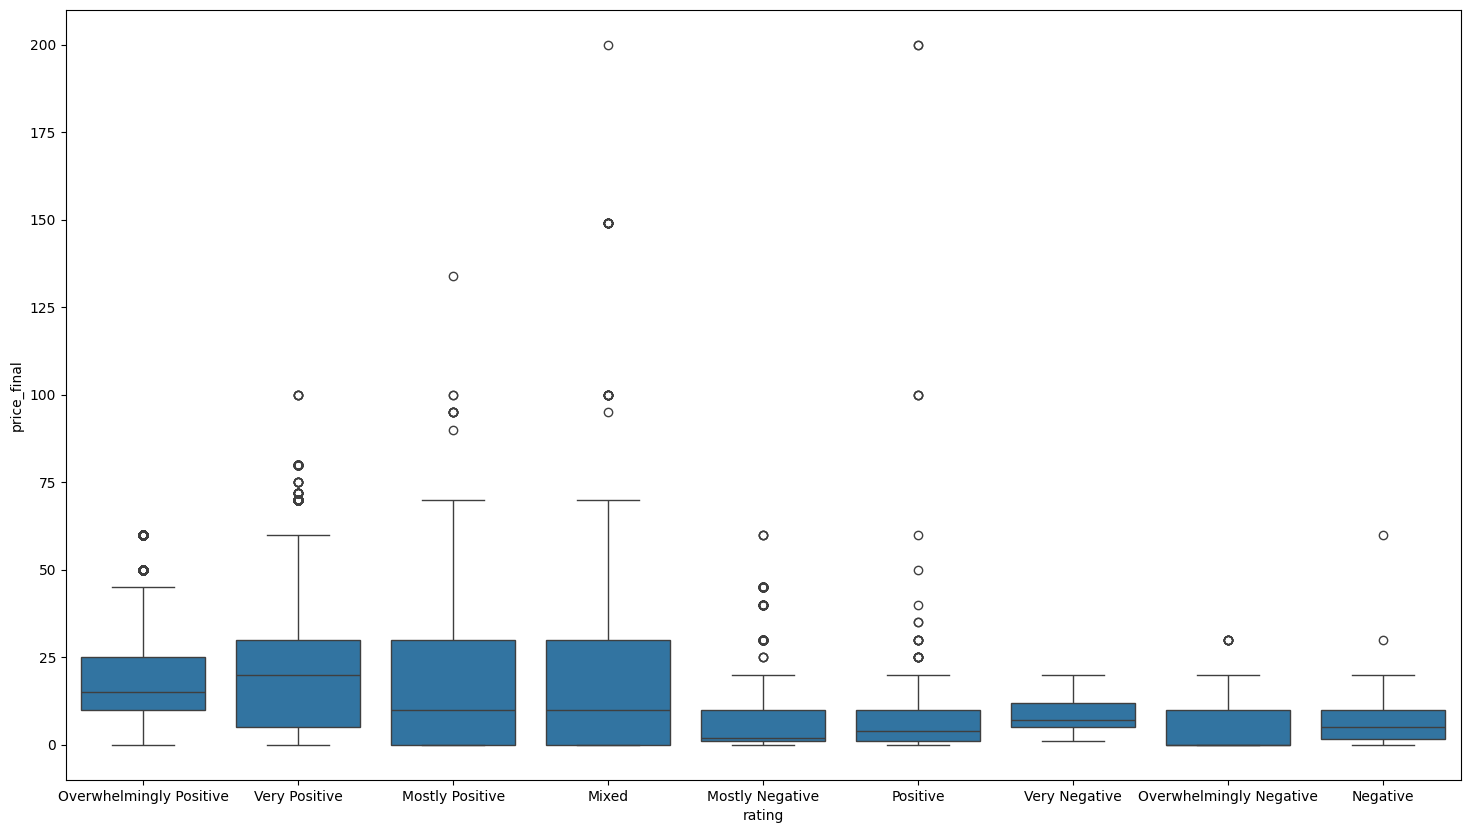

In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(x='rating', y='price_final', data=merged_sampled_data)
plt.show()

In [ ]:
merged_sampled_data.head(2)

,app_id,is_recommended,user_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,products,reviews
0,601150.0,True,6991933.0,Devil May Cry 5,2019-03-07,True,False,False,Overwhelmingly Positive,95,71034,30.0,0.0,0.0,True,402,63
1,400.0,True,11264359.0,Portal,2007-10-10,True,True,True,Overwhelmingly Positive,98,117868,10.0,0.0,0.0,True,403,13


<Figure size 1800x1000 with 0 Axes>

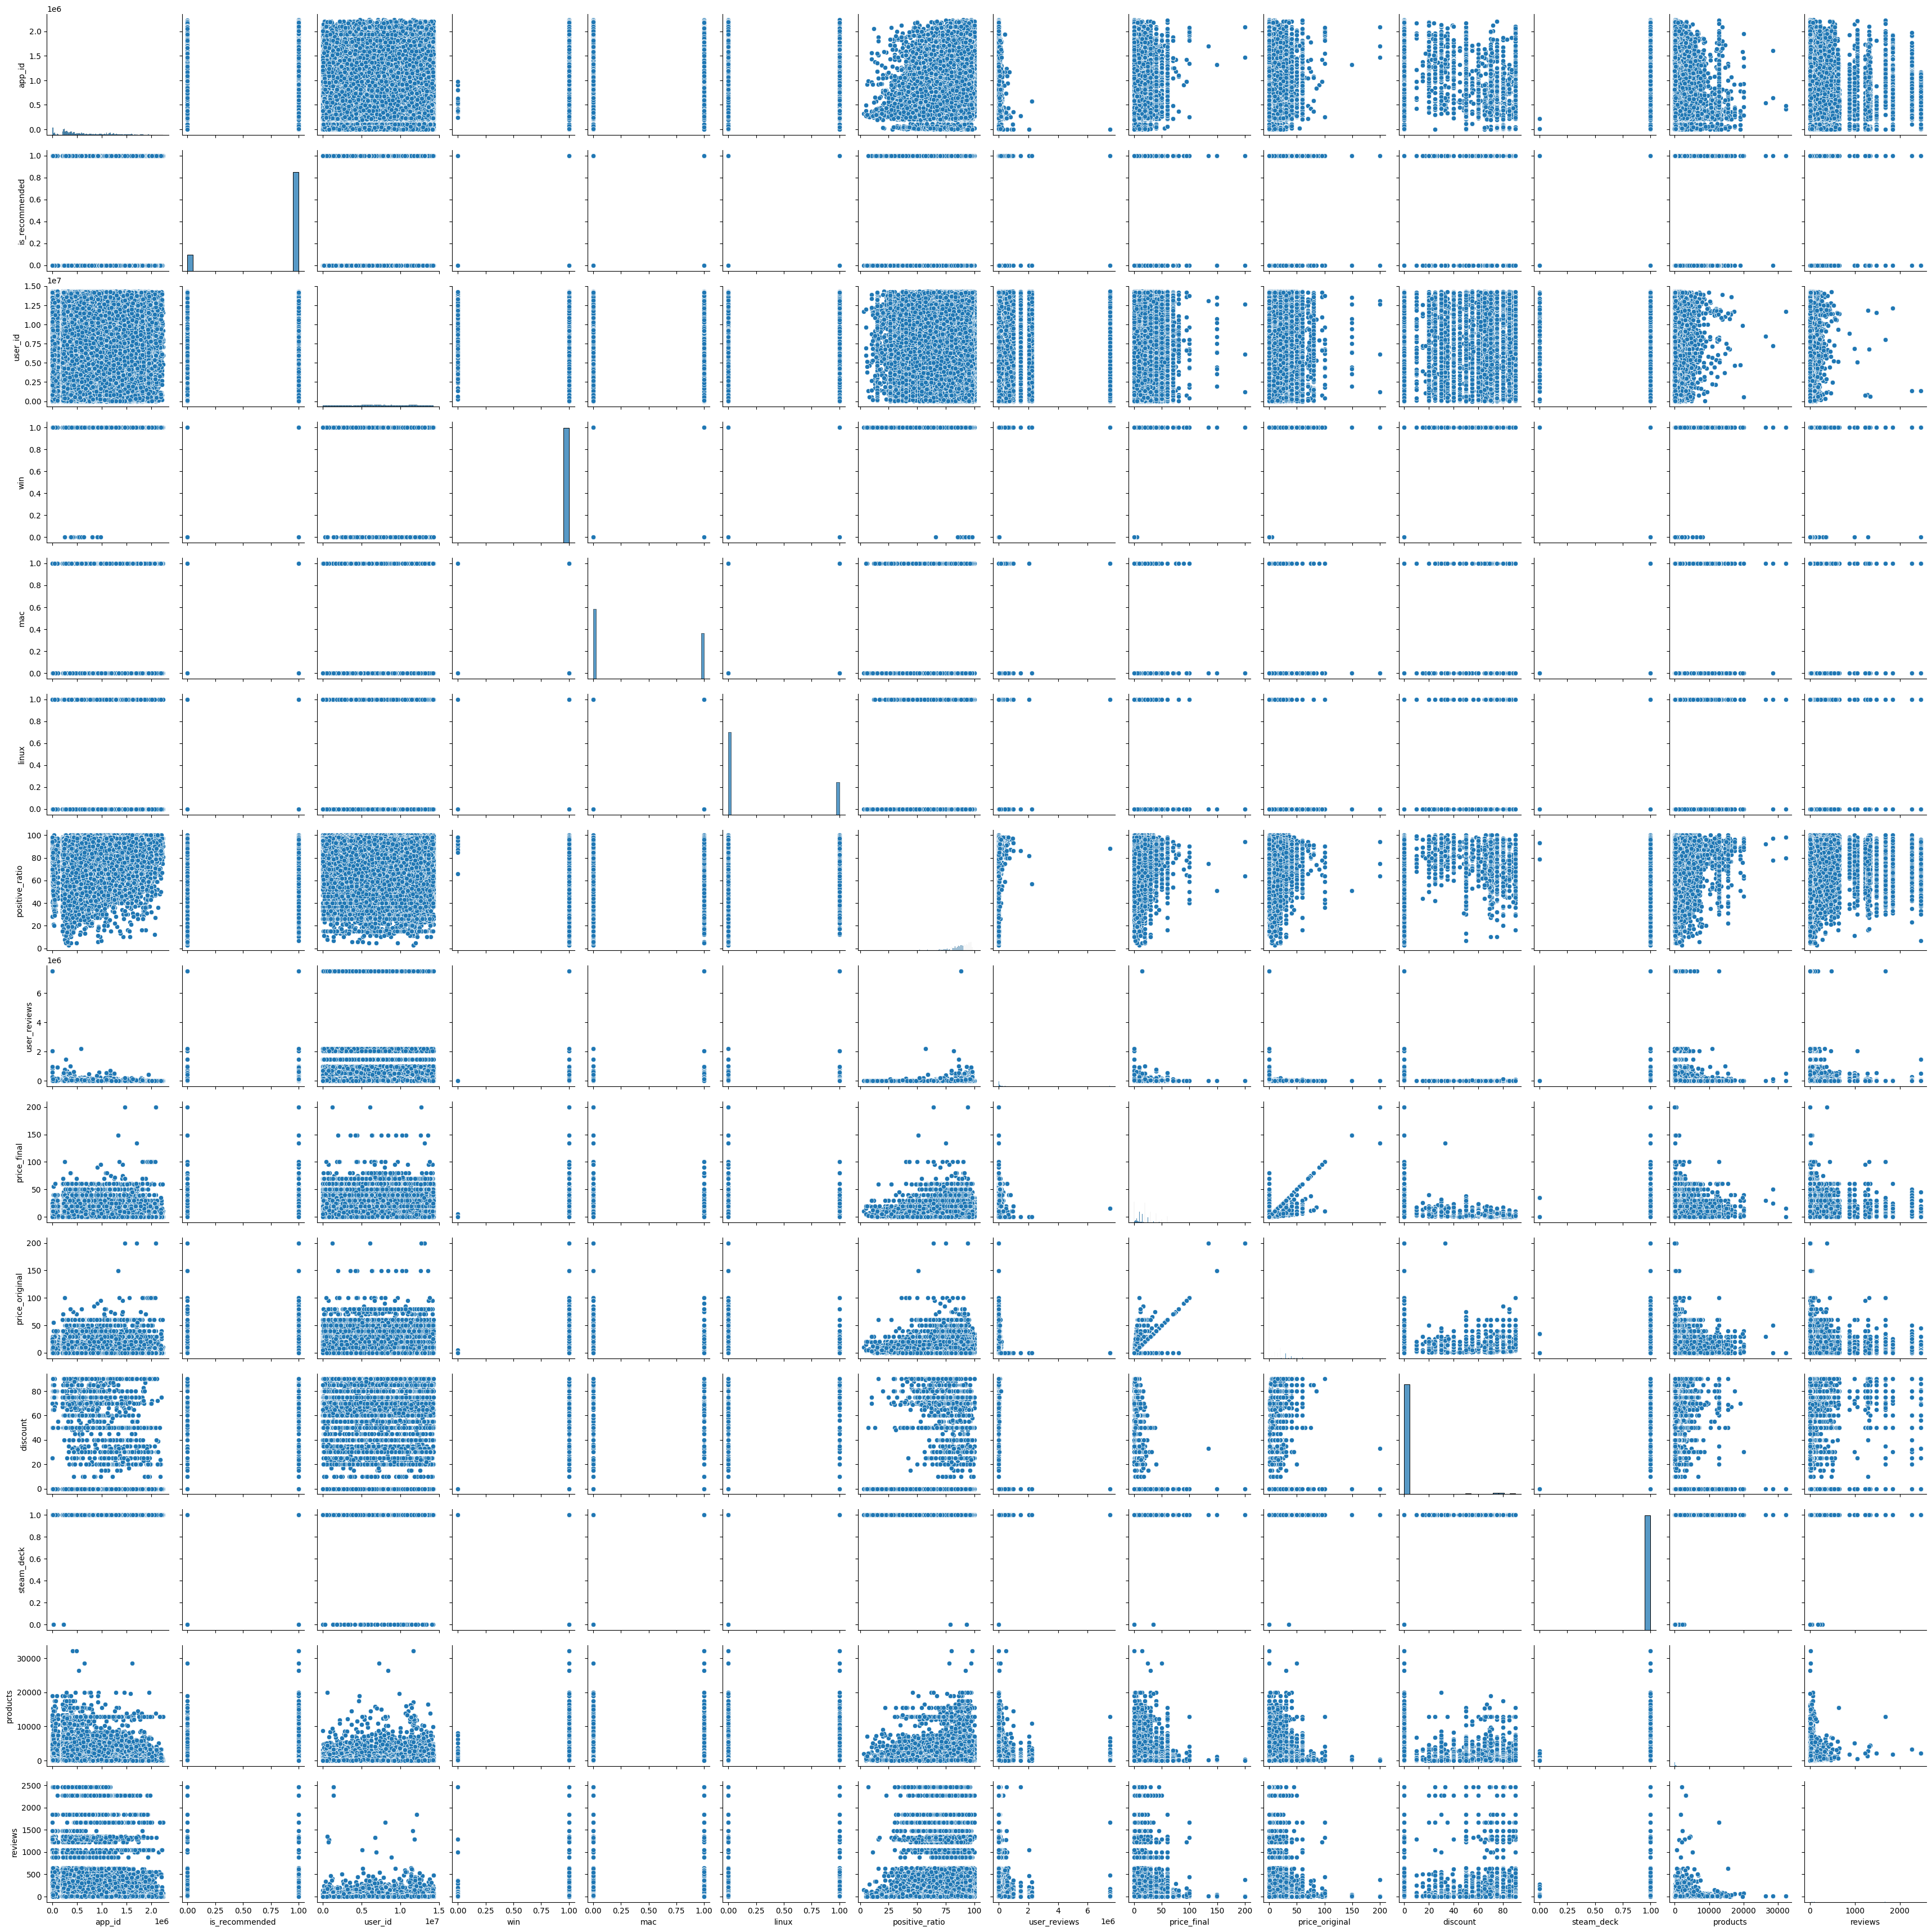

In [ ]:
plt.figure(figsize=(18, 10))
sns.pairplot(data = merged_sampled_data)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['is_recommended', 'win', 'mac', 'linux', 'rating', 'steam_deck']

label_encoder = LabelEncoder()
for col in categorical_columns:
    merged_sampled_data[col] = label_encoder.fit_transform(merged_sampled_data[col])

print(merged_sampled_data[categorical_columns].head())

   is_recommended  win  mac  linux  rating  steam_deck
0               1    1    0      0       5           1
1               1    1    1      1       5           1
2               0    1    0      0       8           1
3               1    1    0      0       8           1
4               1    1    1      1       5           1


In [ ]:
merged_sampled_data.head()

,app_id,is_recommended,user_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,products,reviews
0,601150.0,1,6991933.0,Devil May Cry 5,2019-03-07,1,0,0,5,95,71034,30.00,0.00,0.0,1,402,63
1,400.0,1,11264359.0,Portal,2007-10-10,1,1,1,5,98,117868,10.00,0.00,0.0,1,403,13
2,870780.0,0,11757719.0,Control Ultimate Edition,2020-08-27,1,0,0,8,88,28339,9.99,39.99,75.0,1,72,17
3,552100.0,1,14248104.0,Brick Rigs,2023-07-14,1,0,0,8,93,31911,19.00,0.00,0.0,1,22,2
4,49520.0,1,5719610.0,Borderlands 2,2012-09-17,1,1,1,5,95,184041,20.00,0.00,0.0,1,39,1


In [ ]:
data_corr = merged_sampled_data[['is_recommended', 'win', 'mac', 'linux', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'steam_deck', 'products', 'reviews']]

In [ ]:
data_corr.head(2)

,is_recommended,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,products,reviews
0,1,1,0,0,5,95,71034,30.0,0.0,0.0,1,402,63
1,1,1,1,1,5,98,117868,10.0,0.0,0.0,1,403,13


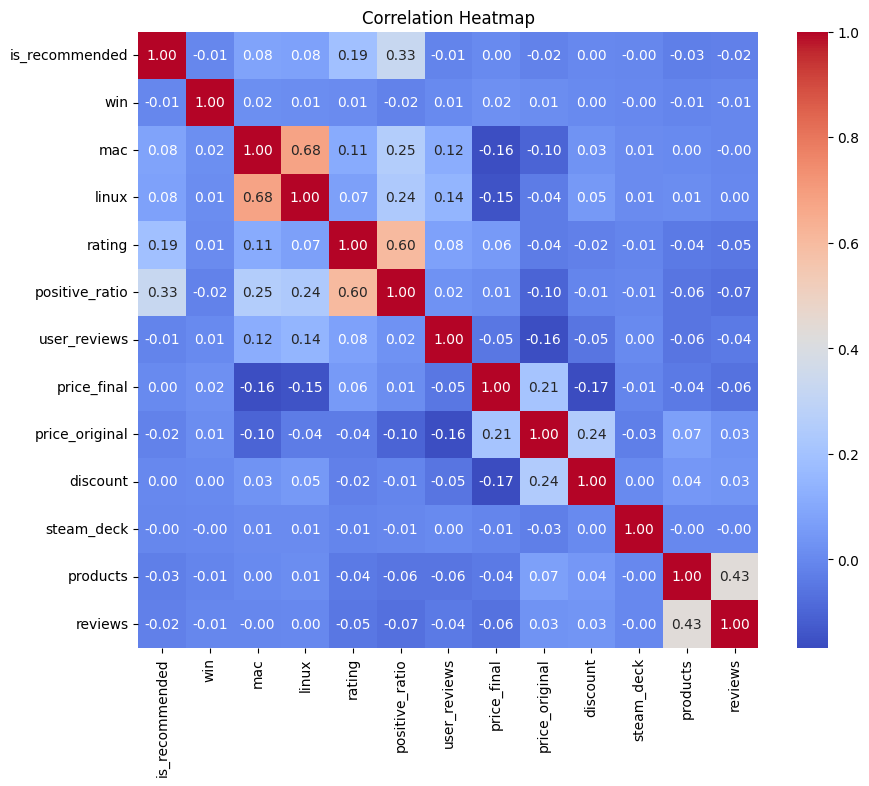

In [ ]:
corr_matrix = data_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_corr)

In [ ]:
scaled_data = pd.DataFrame(scaled_data, columns=data_corr.columns)

In [ ]:
scaled_data.head()

,is_recommended,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,products,reviews
0,0.406976,0.020627,-0.810211,-0.626244,-0.373550,0.786163,-0.177200,0.685692,-0.614695,-0.213884,0.012762,0.160159,0.299368
1,0.406976,0.020627,1.234247,1.596820,-0.373550,1.052307,-0.098036,-0.520553,-0.614695,-0.213884,0.012762,0.161576,-0.106947
2,-2.457145,0.020627,-0.810211,-0.626244,0.754922,0.165159,-0.249367,-0.521157,2.722490,4.870937,0.012762,-0.307341,-0.074441
3,0.406976,0.020627,-0.810211,-0.626244,0.754922,0.608733,-0.243329,0.022257,-0.614695,-0.213884,0.012762,-0.378174,-0.196336
4,0.406976,0.020627,1.234247,1.596820,-0.373550,0.786163,0.013816,0.082569,-0.614695,-0.213884,0.012762,-0.354091,-0.204462


### Model Building

# 1. Content-Based Recommendation System

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import numpy as np

def content_based_recommendation(title, data, num_recommendations=5):
    # Preprocess titles
    data['normalized_title'] = data['title'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

    # Normalize the input title
    normalized_title = re.sub(r'[^\w\s]', '', title.lower())

    # Handle cases where the title doesn't exist
    if normalized_title not in data['normalized_title'].values:
        print(f"'{title}' not found in dataset, showing closest matches.")
        from difflib import get_close_matches
        closest_matches = get_close_matches(normalized_title, data['normalized_title'].unique(), n=1)
        if closest_matches:
            normalized_title = closest_matches[0]
            print(f"Using closest match: '{data[data['normalized_title'] == normalized_title]['title'].iloc[0]}'")
        else:
            return f"No close matches found for '{title}' in the dataset."

    # TF-IDF Vectorization of titles
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['normalized_title'])

    # Calculate similarity scores
    idx = data[data['normalized_title'] == normalized_title].index[0]
    similarity_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

    # Add similarity scores to the dataset
    data['similarity'] = similarity_scores

    # Compute RMSE (assuming self-similarity as actual similarity for evaluation)
    actual_similarity = [1.0 if i == idx else 0.0 for i in range(len(similarity_scores))]
    rmse_score = np.sqrt(mean_squared_error(actual_similarity, similarity_scores))
    print(f"\nContent-Based Filtering RMSE: {rmse_score:.4f}")

    # Sort recommendations by similarity, positive_ratio, and rating
    recommendations = (
        data[data['normalized_title'] != normalized_title]
        .sort_values(by=['similarity', 'positive_ratio', 'rating'], ascending=[False, False, False])
        .drop_duplicates(subset=['title'])
        .head(num_recommendations)
    )

    if recommendations.empty:
        return "No recommendations could be made based on the given title."

    return recommendations[['title', 'similarity', 'positive_ratio', 'rating']]

# Example usage
game_title_input = input("\nEnter a title to get recommendations: ")
content_recommendations = content_based_recommendation(game_title_input, merged_sampled_data)
print(f"\nContent-Based Recommendations for title '{game_title_input}':")
print(content_recommendations)



Enter a title to get recommendations: far cry 3

Content-Based Filtering RMSE: 0.0630

Content-Based Recommendations for title 'far cry 3':
            title  similarity  positive_ratio  rating
4163   Far Cry® 4    1.000000              83       8
6575     Far Cry®    1.000000              82       8
693    Far Cry® 5    1.000000              80       8
10645  Far Cry® 2    1.000000              77       2
32200    Far Away    0.609232              98       5


# 2. Collaborative Filtering Recommendation System

In [ ]:
# Necessary imports
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Prepare data for collaborative filtering
reader = Reader(rating_scale=(0, 1))
cf_data = Dataset.load_from_df(
    merged_sampled_data[['user_id', 'app_id', 'is_recommended']], reader
)

# Train-test split
trainset, testset = train_test_split(cf_data, test_size=0.2, random_state=42)

# Train an SVD model
cf_model = SVD()
cf_model.fit(trainset)

# Evaluate the model
cf_predictions = cf_model.test(testset)
print("\nCollaborative Filtering RMSE:", rmse(cf_predictions))

# Modified function to recommend games for a user
def recommend_for_user_fixed(user_id, model, data, num_recommendations=5):
    user_games = data[data['user_id'] == user_id]['app_id'].unique()
    other_games = data[~data['app_id'].isin(user_games)].drop_duplicates(subset='app_id')

    # Predict scores for unseen games
    predictions = [
        model.predict(user_id, game_id).est for game_id in other_games['app_id']
    ]

    # Add predictions to the dataset
    other_games = other_games.assign(predicted_score=predictions)

    # Normalize predicted scores for better variability
    scaler = MinMaxScaler()
    other_games['normalized_score'] = scaler.fit_transform(
        other_games[['predicted_score']]
    )

    # Adjust similarity using weighted combination of features
    other_games['similarity'] = (
        0.6 * other_games['normalized_score'] +
        0.2 * (other_games['positive_ratio'] / 100) +
        0.2 * (other_games['rating'] / 10)
    )

    # Sort recommendations by adjusted similarity
    top_recommendations = other_games.sort_values(by='similarity', ascending=False).head(num_recommendations)

    # Select only required columns
    formatted_recommendations = top_recommendations[['title', 'similarity', 'positive_ratio', 'rating']]
    return formatted_recommendations

# Prompt user for a user_id to get recommendations
user_id_input = int(input("\nEnter a user ID to get recommendations: "))
collaborative_recommendations = recommend_for_user_fixed(user_id_input, cf_model, merged_sampled_data)

# Print recommendations in formatted style
print(f"\nCollaborative Filtering Recommendations for User {user_id_input}:")
print(collaborative_recommendations.to_string(index=False))


RMSE: 0.3293

Collaborative Filtering RMSE: 0.32931892769530313

Enter a user ID to get recommendations: 2431546

Collaborative Filtering Recommendations for User 2431546:
                                           title  similarity  positive_ratio  rating
Touhou Kaeizuka ～ Phantasmagoria of Flower View.       0.960             100       8
                              Escape FishStop 3D       0.960             100       8
                                 Please Be Happy       0.958              99       8
                       Sunshine Heavy Industries       0.958              99       8
                                      Pizza Game       0.958              99       8
